#### MLP using the sklearn
- Data preparation
- Data modeling
- Accuracy

In [56]:
## Data preparation
from sklearn.datasets import make_circles

X,Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)
print(X.shape)
print(Y.shape)

(500, 2)
(500,)


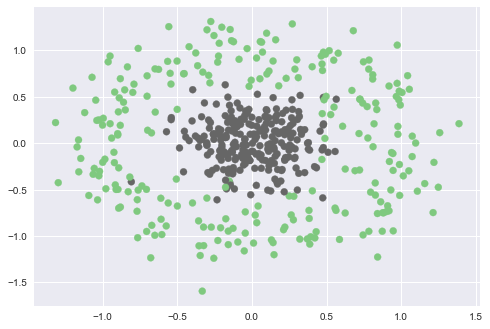

In [57]:
import matplotlib.pyplot as plt

plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

In [58]:
from keras.layers import Dense
from keras.models import Sequential

In [59]:
from keras.utils import to_categorical
Y_ = to_categorical(Y)

In [60]:
model = Sequential()
model.add(Dense(units=4, activation='relu', input_shape=(2,)))
model.add(Dense(units=3, activation='relu'))          
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_46 (Dense)             (None, 3)                 15        
_________________________________________________________________
dense_47 (Dense)             (None, 2)                 8         
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.compile(optimizer='adam',loss="categorical_crossentropy")

In [62]:
hist = model.fit(X,Y_,epochs=15,batch_size=8,validation_split=0.2)

Train on 400 samples, validate on 100 samples
Epoch 1/15
400/400 [==============================] - 0s 462us/step - loss: 0.7217 - val_loss: 0.7088
Epoch 2/15
400/400 [==============================] - 0s 212us/step - loss: 0.6905 - val_loss: 0.6841
Epoch 3/15
400/400 [==============================] - 0s 368us/step - loss: 0.6629 - val_loss: 0.6642
Epoch 4/15
400/400 [==============================] - 0s 290us/step - loss: 0.6389 - val_loss: 0.6443
Epoch 5/15
400/400 [==============================] - 0s 212us/step - loss: 0.6164 - val_loss: 0.6259
Epoch 6/15
400/400 [==============================] - 0s 212us/step - loss: 0.5954 - val_loss: 0.6087
Epoch 7/15
400/400 [==============================] - 0s 212us/step - loss: 0.5751 - val_loss: 0.5916
Epoch 8/15
400/400 [==============================] - 0s 290us/step - loss: 0.5550 - val_loss: 0.5758
Epoch 9/15
400/400 [==============================] - 0s 290us/step - loss: 0.5370 - val_loss: 0.5604
Epoch 10/15
400/400 [===============

In [66]:
y_pred = model.predict_classes(X)
acc = ((y_pred==Y).sum())/X.shape[0]
print("The accuracy is {}".format(acc*100))

The accuracy is 85.8
